In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("GlobalLandTemperaturesByMajorCity.csv")

In [4]:
data.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


In [8]:
data_london = data[data["City"] == "London"].copy()

data_london["dt"] = pd.to_datetime(data_london["dt"])

data_london = data_london[
    (data_london["dt"].dt.year >= 1970) &
    (data_london["dt"].dt.year <= 2020)
]

data_london = data_london.dropna(subset=["AverageTemperature"])

data_london.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
131321,1970-01-01,3.464,0.463,London,United Kingdom,52.24N,0.00W
131322,1970-02-01,2.872,0.406,London,United Kingdom,52.24N,0.00W
131323,1970-03-01,3.603,0.322,London,United Kingdom,52.24N,0.00W
131324,1970-04-01,6.661,0.250,London,United Kingdom,52.24N,0.00W
131325,1970-05-01,13.100,0.320,London,United Kingdom,52.24N,0.00W


In [19]:
data_london["Year"] = data_london["dt"].dt.year

yearly_avg = (data_london.groupby("Year")["AverageTemperature"].mean().reset_index())

yearly_avg.head()

,Year,AverageTemperature
0,1970,9.690833
1,1971,9.888917
2,1972,9.411583
3,1973,9.750083
4,1974,9.698083


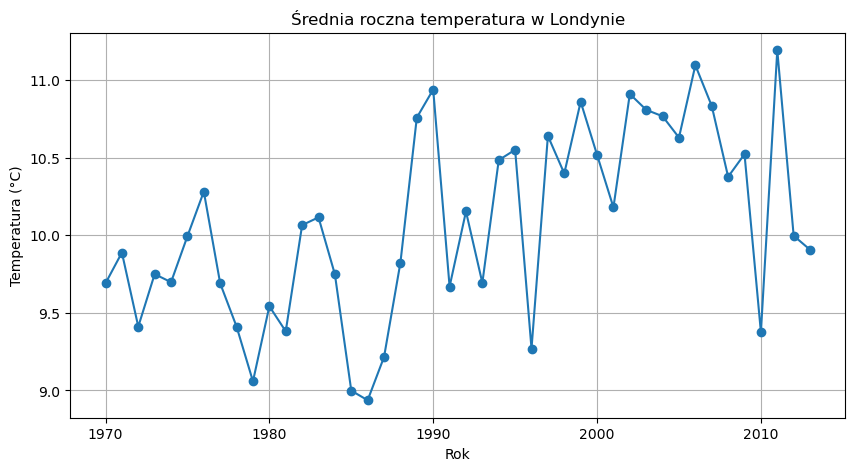

In [13]:
plt.figure(figsize=(10, 5))
plt.plot(
    yearly_avg["Year"],
    yearly_avg["AverageTemperature"],
    marker="o"
)

plt.title(f"Średnia roczna temperatura w Londynie")
plt.xlabel("Rok")
plt.ylabel("Temperatura (°C)")
plt.grid(True)
plt.show()

In [16]:
avg_1970_1990 = yearly_avg[(yearly_avg["Year"] >= 1970) & (yearly_avg["Year"] <= 1990)]["AverageTemperature"].mean()
avg_2000_2020 = yearly_avg[(yearly_avg["Year"] >= 2000) & (yearly_avg["Year"] <= 2020)]["AverageTemperature"].mean()

difference = avg_2000_2020 - avg_1970_1990

print(f"Średnia 1970-1990: {avg_1970_1990:.2f} °C")
print(f"Średnia 2000-2020: {avg_2000_2020:.2f} °C")
print(f"Różnica: {difference:.2f} °C")

Średnia 1970-1990: 9.73 °C
Średnia 2000-2020: 10.51 °C
Różnica: 0.78 °C


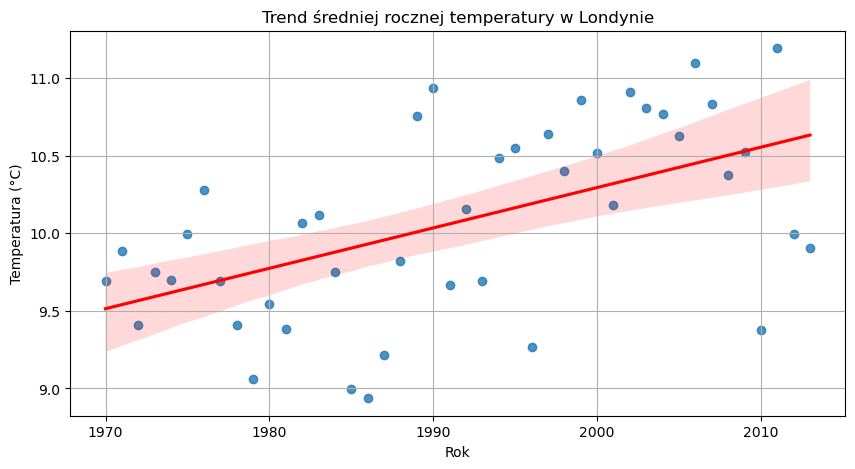

In [18]:
plt.figure(figsize=(10, 5))

sns.regplot(
    x="Year",
    y="AverageTemperature",
    data=yearly_avg,
    scatter=True,
    line_kws={"color": "red"}
)

plt.title(f"Trend średniej rocznej temperatury w Londynie")
plt.xlabel("Rok")
plt.ylabel("Temperatura (°C)")
plt.grid(True)
plt.show()

Na wykresie można zobaczyć trend wzrostowy temperatury.

Dodatkowo informacje do sprawdzenia to np. emisje CO2 i innych gazów cieplarnianych.